# 24BAD099 - Rithish A

Accuracy: 0.9704035874439462
Precision: 0.8726114649681529
Recall: 0.9133333333333333
F1 Score: 0.8925081433224755

Sample Misclassified Messages:
3245    Funny fact Nobody teaches volcanoes 2 erupt, t...
683     Hi I'm sue. I am 20 years old and work as a la...
4730                            K:)eng rocking in ashes:)
4328    1Apple/Day=No Doctor. 1Tulsi Leaf/Day=No Cance...
4700                               I liked the new mobile
Name: message, dtype: object


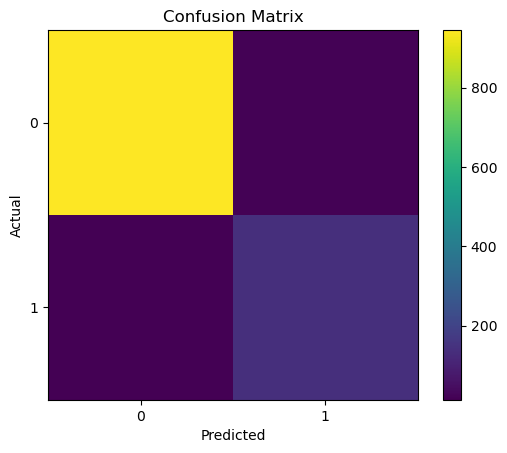

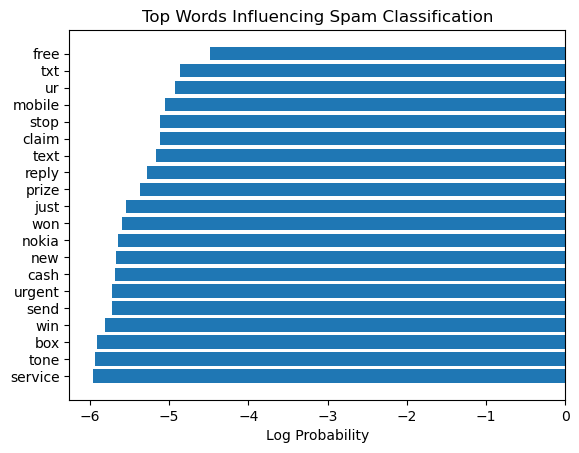

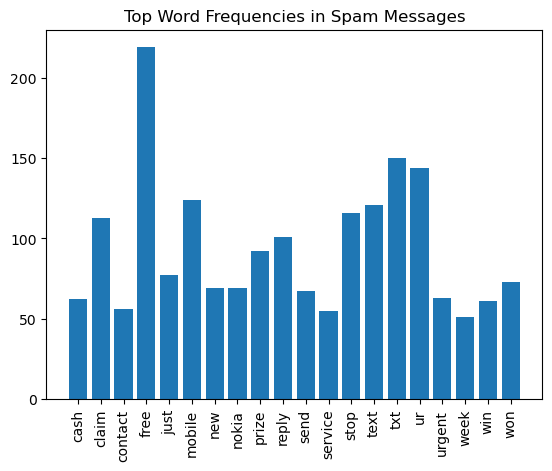


With alpha = 2
Accuracy: 0.9757847533632287
Precision: 0.9241379310344827
Recall: 0.8933333333333333
F1 Score: 0.9084745762711864


In [1]:

#24BAD099 - Rithish A
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("spam.csv", encoding='latin-1')

df = df.iloc[:, :2]
df.columns = ['label', 'message']

def clean_text(text):
    text = text.lower()
    text = re.sub(f"[{string.punctuation}]", "", text)
    text = re.sub(r"\d+", "", text)
    return text

df['cleaned_message'] = df['message'].apply(clean_text)

vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['cleaned_message'])

le = LabelEncoder()
y = le.fit_transform(df['label'])  

X_train, X_test, y_train, y_test, msg_train, msg_test = train_test_split(
    X, y, df['message'], test_size=0.2, random_state=42
)

model = MultinomialNB(alpha=1.0)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

misclassified = msg_test[y_test != y_pred]
print("\nSample Misclassified Messages:")
print(misclassified.head())

cm = confusion_matrix(y_test, y_pred)

plt.figure()
plt.imshow(cm)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.colorbar()
plt.xticks([0,1])
plt.yticks([0,1])
plt.show()

feature_names = vectorizer.get_feature_names_out()
spam_class_index = 1
top_spam_indices = np.argsort(model.feature_log_prob_[spam_class_index])[-20:]
top_spam_words = feature_names[top_spam_indices]

plt.figure()
plt.barh(top_spam_words, model.feature_log_prob_[spam_class_index][top_spam_indices])
plt.title("Top Words Influencing Spam Classification")
plt.xlabel("Log Probability")
plt.show()

spam_messages = df[df['label'] == 'spam']['cleaned_message']

spam_vector = CountVectorizer(stop_words='english', max_features=20)
spam_counts = spam_vector.fit_transform(spam_messages)
spam_sum = np.sum(spam_counts.toarray(), axis=0)

plt.figure()
plt.bar(spam_vector.get_feature_names_out(), spam_sum)
plt.title("Top Word Frequencies in Spam Messages")
plt.xticks(rotation=90)
plt.show()

model_alpha_2 = MultinomialNB(alpha=2.0)
model_alpha_2.fit(X_train, y_train)
y_pred_alpha_2 = model_alpha_2.predict(X_test)

print("\nWith alpha = 2")
print("Accuracy:", accuracy_score(y_test, y_pred_alpha_2))
print("Precision:", precision_score(y_test, y_pred_alpha_2))
print("Recall:", recall_score(y_test, y_pred_alpha_2))
print("F1 Score:", f1_score(y_test, y_pred_alpha_2))